In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick


In [5]:
!pip install scikit-learn==1.4.2

In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/calories.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/exercise.csv')

In [7]:
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
df_1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
df_merge = pd.merge(df, df_1, on='User_ID')

In [10]:
def dataset_info_statistics(df_merge):

  #Display general information about data set
  print("Dataset Information")
  print(df_merge.info())
  print("\n")

  #Display basic Statistics for numerical columns
  print("\n")
  print("Basic Statistics for Numerical Columns")
  print(df_merge.describe())
  print("\n")

In [11]:
dataset_info_statistics(df_merge)

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None




Basic Statistics for Numerical Columns
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.03565

In [12]:
df_merge.isnull().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [13]:
duplicate_rows = df_merge.duplicated().sum()

if duplicate_rows > 0:
    print("There are", duplicate_rows, "duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the merged DataFrame.")


There are no duplicate rows in the merged DataFrame.


In [14]:
# Function to plot histograms for numerical columns and count plots for categorical columns
def plot_graphs(df_merge):
    # Plot histograms for numerical columns
    numeric_columns = df_merge.select_dtypes(include=['int64', 'float64']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df_merge[column], kde=True, bins=30)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()



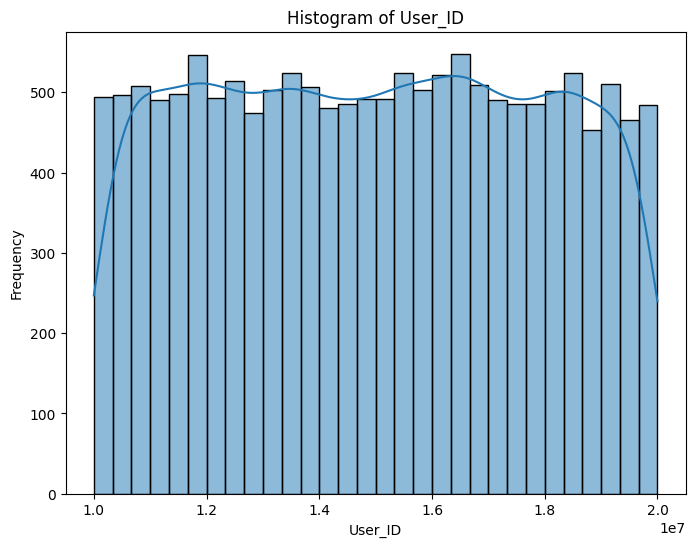

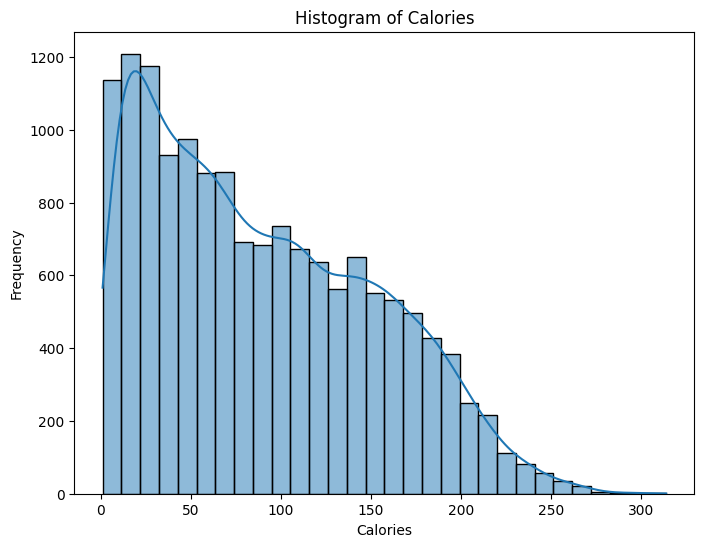

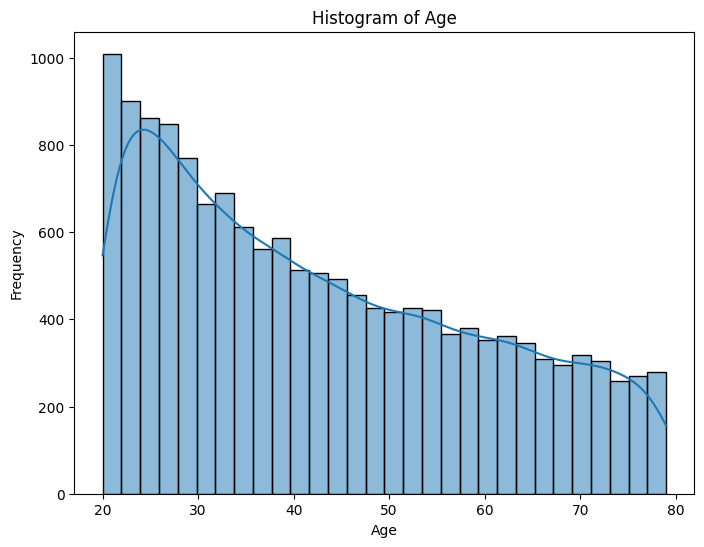

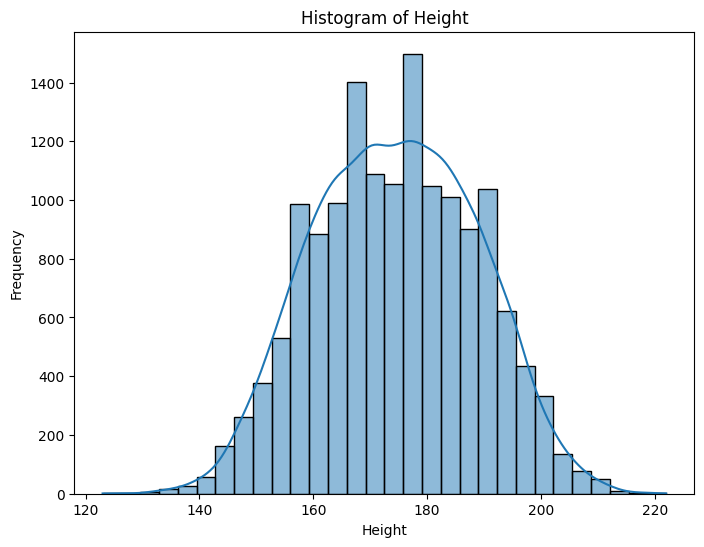

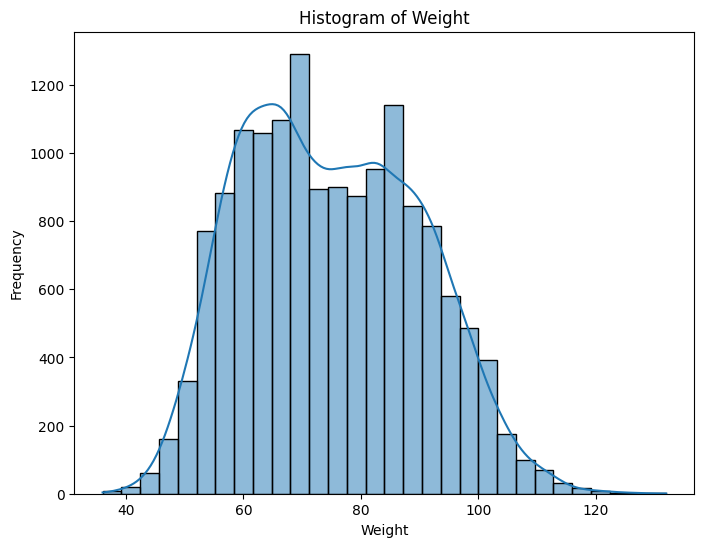

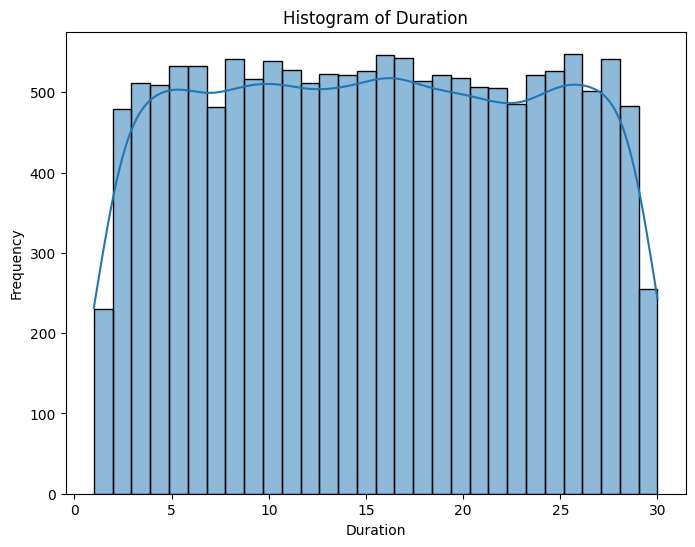

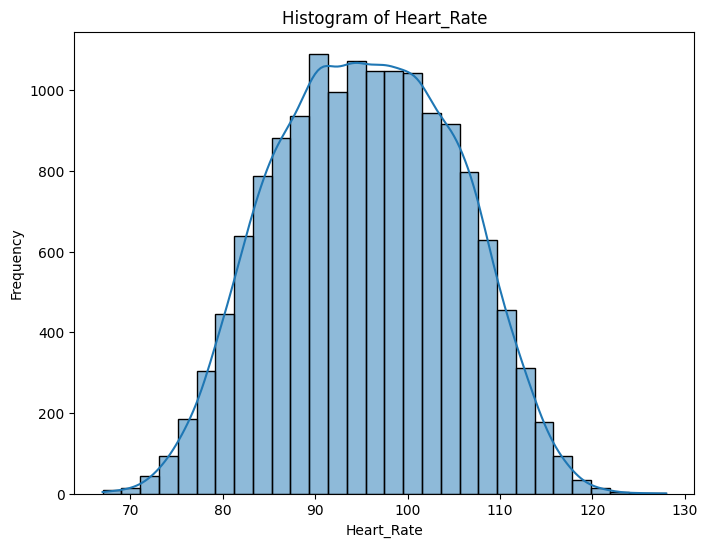

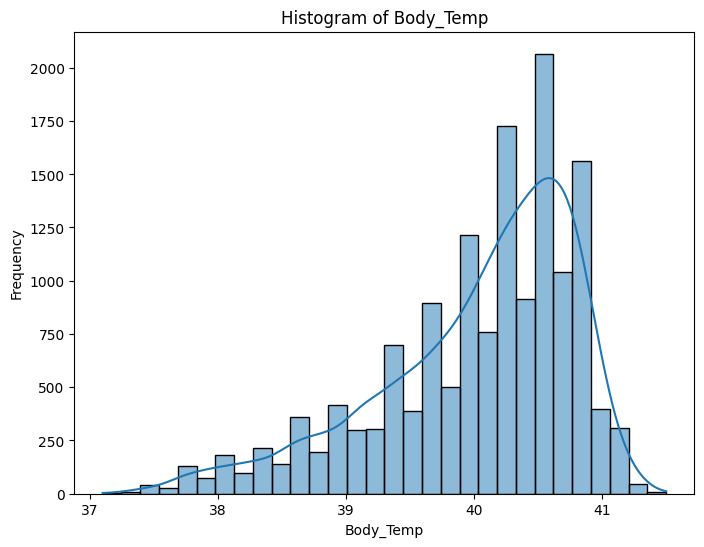

In [15]:
plot_graphs(df_merge)

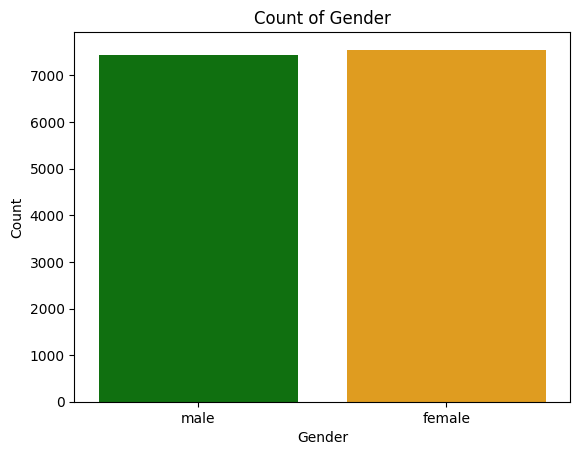

In [16]:
df_merge.rename(columns={' gender': 'Gender'}, inplace=True)

# Now try to access the 'Gender' column again and create the count plot
sns.countplot(x='Gender', data=df_merge, palette=['green', 'orange'])
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [17]:
df_merge.dtypes

,0
User_ID,int64
Calories,float64
Gender,object
Age,int64
Height,float64
Weight,float64
Duration,float64
Heart_Rate,float64
Body_Temp,float64


In [18]:
# Function to create boxplots for numerical variables
def plot_boxplots(df_merge):
    numeric_columns = df_merge.select_dtypes(include=['int64', 'float64']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df_merge[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

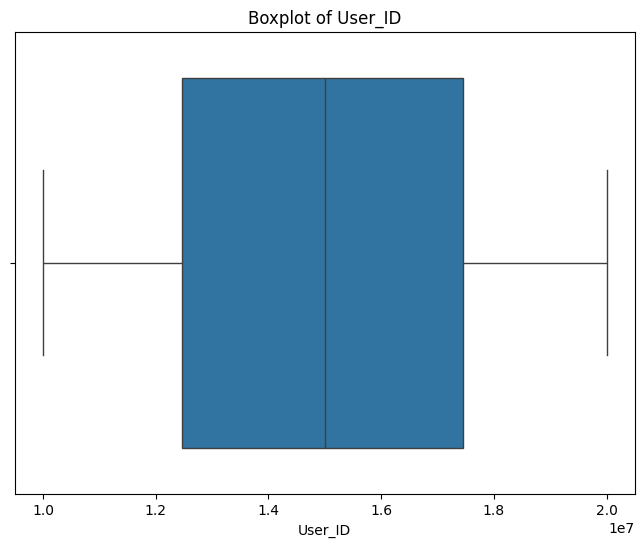

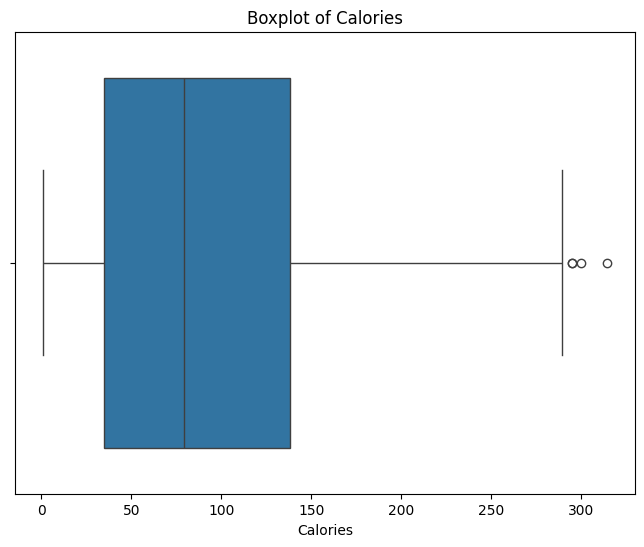

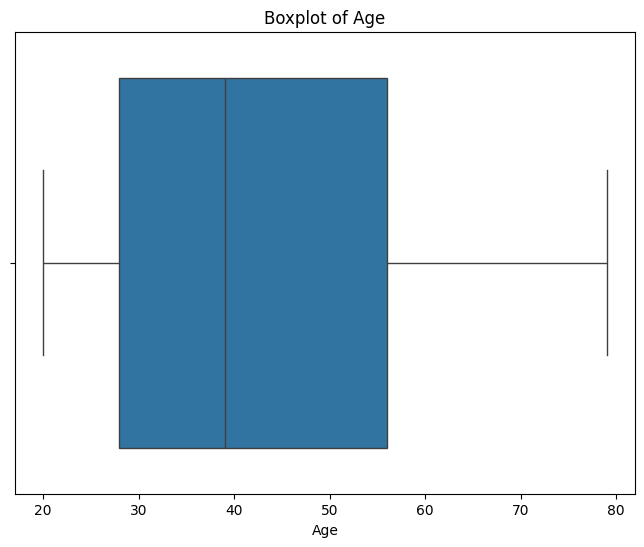

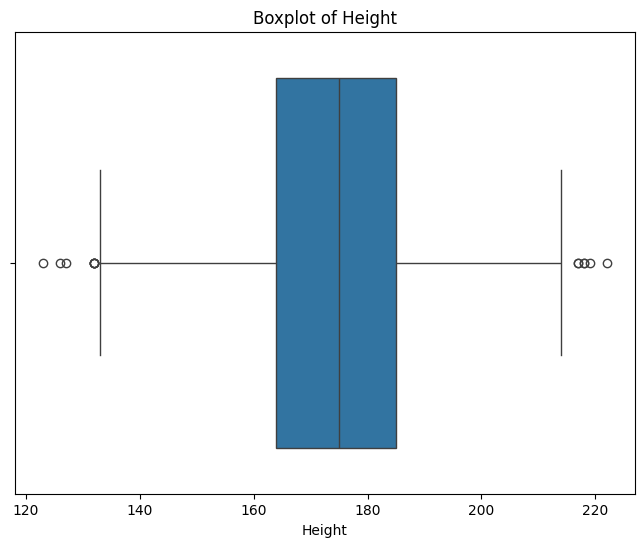

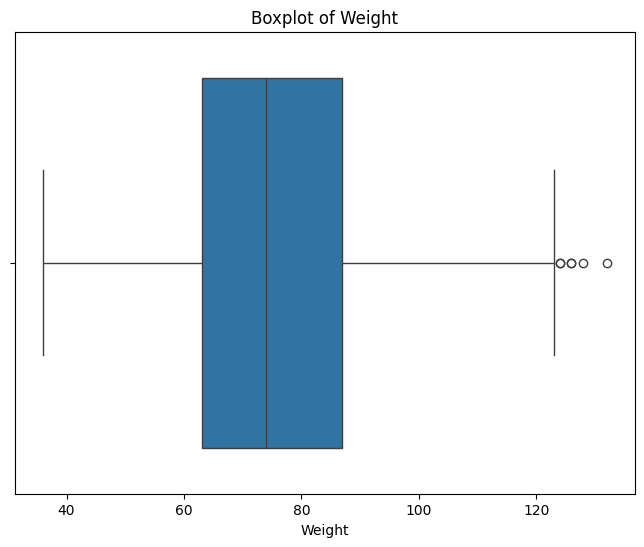

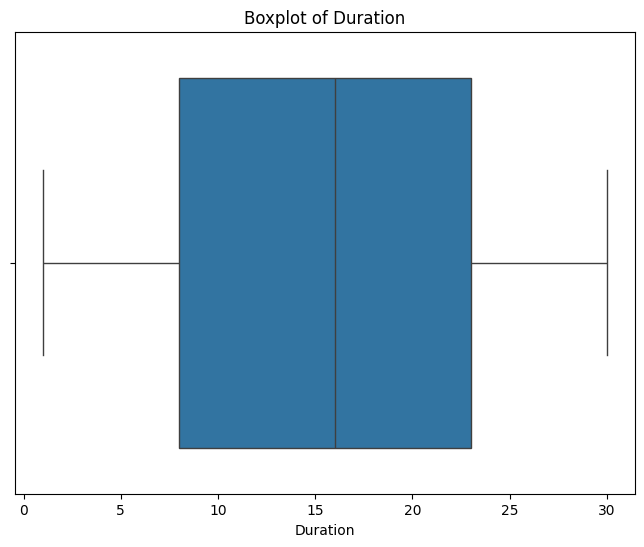

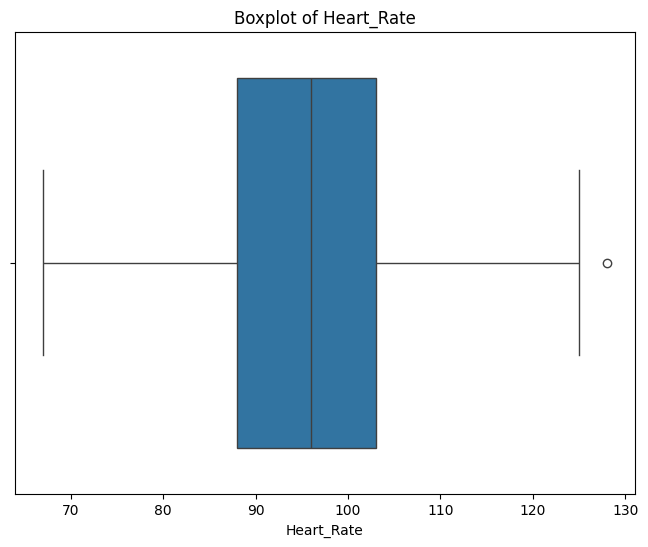

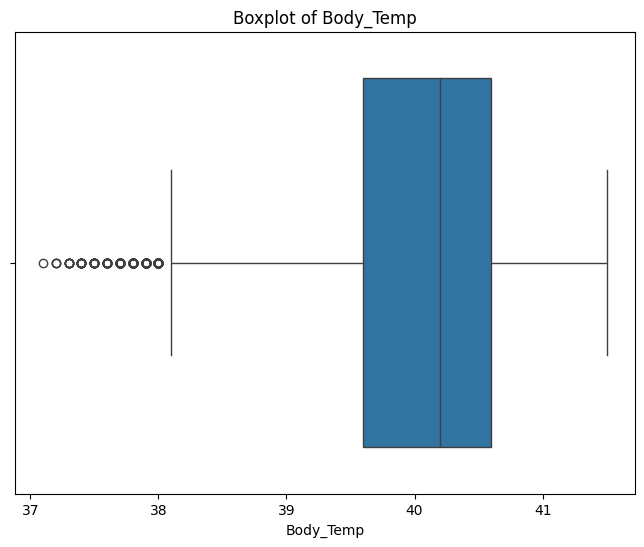

In [19]:
# Call the function to plot boxplots
plot_boxplots(df_merge)

<Axes: >

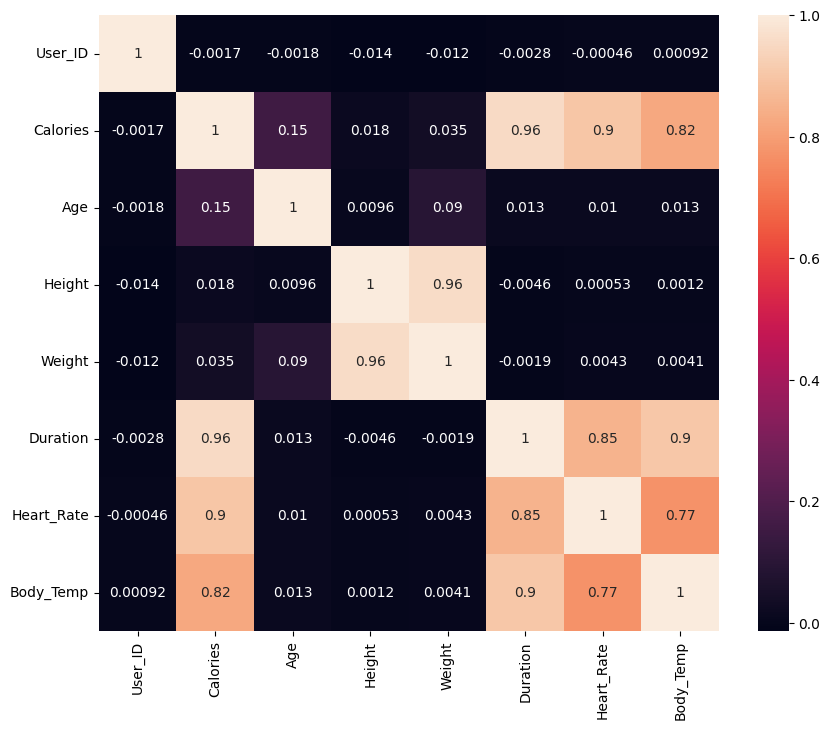

In [20]:
# Display the correlation matrix
plt.figure(figsize=(10, 8))

sns.heatmap(df_merge.drop(['Gender'], axis=1).corr(), annot=True)

In [21]:
df_merge.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [22]:
df_merge.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [23]:
def sep_features_target(df_merge, target_column):
    X = df_merge.drop(target_column, axis=1)
    y = df_merge[target_column]
    return X, y

In [24]:
X,y=sep_features_target(df_merge, 'Calories')

In [25]:
# Import necessary library
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming X is already defined as your feature set
scaler = MinMaxScaler()

# List of features to scale
sclr_features = ["Age", "Height", "Weight", "Duration", "Heart_Rate"]

# Create a DataFrame to store scaled features
df_scaled = pd.DataFrame(data=X)

# Apply MinMaxScaler to the selected features
df_scaled[sclr_features] = scaler.fit_transform(X[sclr_features])

# Print the scaled features
print("Scaled Features:\n", df_scaled[sclr_features].head())

Scaled Features:
         Age    Height    Weight  Duration  Heart_Rate
0  0.813559  0.676768  0.604167  0.965517    0.622951
1  0.000000  0.434343  0.250000  0.448276    0.442623
2  0.830508  0.565657  0.447917  0.137931    0.344262
3  0.237288  0.565657  0.364583  0.413793    0.540984
4  0.118644  0.313131  0.229167  0.310345    0.229508


In [26]:
X.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [27]:
y.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [28]:
X = X.drop(columns=['User_ID'],axis=1)

In [29]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4
14996,female,27,165.0,65.0,6.0,85.0,39.2
14997,female,43,159.0,58.0,16.0,90.0,40.1
14998,male,78,193.0,97.0,2.0,84.0,38.3


In [30]:
from sklearn.model_selection import train_test_split

# Function to perform train-test split
def perform_train_test_split(X, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [31]:
X_train,X_test,y_train,y_test = perform_train_test_split(X,y,test_size=0.20, random_state=42)


In [32]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9839,male,37,179.0,77.0,7.0,81.0,39.5
9680,male,23,195.0,87.0,26.0,110.0,40.5
7093,male,33,181.0,77.0,12.0,88.0,40.1
11293,female,66,156.0,54.0,9.0,77.0,39.5
820,female,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
5191,female,75,148.0,51.0,22.0,104.0,40.6
13418,female,21,172.0,67.0,20.0,104.0,40.7
5390,male,57,189.0,92.0,8.0,90.0,39.5
860,male,35,174.0,76.0,12.0,97.0,40.2


In [33]:
X.shape

(15000, 7)

In [34]:
X_train.shape

(12000, 7)

In [35]:
X_test.shape

(3000, 7)

##Column Transformer and Pipeline

In [36]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate']),
  ], remainder='passthrough')

In [37]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('preprocessor', preprocessor),
          ("model",LinearRegression())])

In [38]:
from sklearn import set_config

In [39]:
set_config(display='diagram')

In [40]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration',
                                                   'Heart_Rate'])])),
                ('model', LinearRegression())])

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration',
                                                   'Heart_Rate'])])),
                ('model', LinearRegression())])

In [42]:
y_pred = pipeline.predict(X_test)

In [43]:
r2_score(y_test,y_pred)

0.9672937151257295

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

8.441513553849708

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold

In [46]:
from sklearn.model_selection import cross_val_score,KFold

In [47]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

In [48]:
cv_results = cross_val_score(pipeline,X,y,cv = kfold,scoring = 'r2')

In [49]:
cv_results

array([0.96729372, 0.96543156, 0.9674671 , 0.96819535, 0.96731342])

In [50]:
cv_results.mean()

0.9671402283675841

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error

def model_score(model_name, model, X, y, preprocessor):
    output = []
    output.append(model_name)

    # Create a pipeline with the preprocessor and model
    pipeline = Pipeline([('preprocessor', preprocessor),
                         ("model", model)])

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict using the pipeline
    y_pred = pipeline.predict(X_test)

    # Append R2 score and Mean Absolute Error to output
    output.append(r2_score(y_test, y_pred))
    output.append(mean_absolute_error(y_test, y_pred))

    # Cross-validation with KFold
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    output.append(cv_results.mean())

    return output


In [52]:
model_dict={
    'log':LinearRegression(),
    'rf':RandomForestRegressor(),
    'xgb':XGBRegressor(),
}


In [53]:
model_output = []
for model_name, model in model_dict.items():
    model_output.append(model_score(model_name, model, X, y, preprocessor))

In [54]:
model_output

[['log', 0.9672937151257295, 8.441513553849708, 0.9671402283675841],
 ['rf', 0.9982775596544795, 1.69122, 0.997937720609961],
 ['xgb', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

In [55]:
# Evaluate the performance of a machine learning model using R2 score, mean absolute error, and cross validation.

#parameters:
     #model_name: str, name for the model.
     #model: machine learning model, the model to be evaluated.

#Return:
     #output: list, containing model name, r2 score, r2 score, mean absolute error and cross-validation

In [56]:

pipeline=Pipeline([('preprocessor', preprocessor),
          ("model",XGBRegressor())])

In [57]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration',
                                                   'Heart_Rate'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              ear...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [58]:
import pandas as pd
sample = pd.DataFrame({
    'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105,
    'Body_Temp':40.8,
},index=[0])

In [59]:
pipeline.predict(sample)

array([231.0721], dtype=float32)

#Save the model

In [60]:
import pickle
with open('model.pkl','wb') as file:
  pickle.dump(pipeline,file)

In [61]:
with open('model.pkl','rb') as file:
  pipeline_saved=pickle.load(file)

In [62]:
pipeline_saved.predict(sample)

array([231.0721], dtype=float32)

In [63]:
# import pickle
# import pandas as pd
# from tkinter import *

# def show_entry():

#     with open('pipeline.pkl','rb') as f:
#         pipeline = pickle.load(f)

#     p1 = str(clicked.get())
#     p2 = float(e2.get())
#     p3 = float(e3.get())
#     p4 = float(e4.get())
#     p5 = float(e5.get())
#     p6 = float(e6.get())
#     p7 = float(e7.get())

#     sample = pd.DataFrame({
#     'Gender':[p1],
#     'Age':[p2],
#     'Height':[p3],
#     'Weight':[p4],
#     'Duration':[p5],
#     'Heart_Rate':[p6],
#     'Body_Temp':[p7],
# },index=[0])

#     result = pipeline.predict(sample)
#     print(result)
#     Label(master, text="Amount of Calories Burnt").grid(row=13)
#     Label(master, text=result[0]).grid(row=14)


# master =Tk()
# master.title("Calories Burnt Prediction using Machine Learning")
# label = Label(master,text = "Calories Burnt Prediction",bg = "black",
#                fg = "white").grid(row=0,columnspan=2)

# Label(master,text = "Select Gender").grid(row=1)
# Label(master,text = "Enter Your Age").grid(row=2)
# Label(master,text = "Enter Your Height").grid(row=3)
# Label(master,text = "Enter Your Weight").grid(row=4)
# Label(master,text = "Duration").grid(row=5)
# Label(master,text = "Heart Rate").grid(row=6)
# Label(master,text = "Body Temp").grid(row=7)

# clicked = StringVar()
# options = ['male', 'female']

# e1 = OptionMenu(master , clicked , *options )
# e1.configure(width=15)
# e2 = Entry(master)
# e3 = Entry(master)
# e4 = Entry(master)
# e5 = Entry(master)
# e6 = Entry(master)
# e7 = Entry(master)


# e1.grid(row=1,column=1)
# e2.grid(row=2,column=1)
# e3.grid(row=3,column=1)
# e4.grid(row=4,column=1)
# e5.grid(row=5,column=1)
# e6.grid(row=6,column=1)
# e7.grid(row=7,column=1)



# Button(master,text="Predict",command=show_entry).grid()

# mainloop()

In [64]:
import pickle
import pandas as pd

def predict_calories(p1, p2, p3, p4, p5, p6, p7):
    with open('model.pkl','rb') as f:
        pipeline = pickle.load(f)

    sample = pd.DataFrame({
        'Gender': [p1],
        'Age': [p2],
        'Height': [p3],
        'Weight': [p4],
        'Duration': [p5],
        'Heart_Rate': [p6],
        'Body_Temp': [p7],
    }, index=[0])

    result = pipeline.predict(sample)
    return result[0]

# Example inputs
p1 = 'male'   # Gender
p2 = 27       # Age
p3 = 180      # Height in cm
p4 = 75       # Weight in kg
p5 = 39       # Duration in minutes
p6 = 140      # Heart Rate in bpm
p7 = 40     # Body Temperature in Celsius

predicted_calories = predict_calories(p1, p2, p3, p4, p5, p6, p7)
print(f"Predicted Calories Burnt: {predicted_calories}")


Predicted Calories Burnt: 261.3036193847656
